In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
# Configure Matplotlib to use LaTeX
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 18})
# Use latex font 

In [6]:
def subG_css(trSigma, lambdamax, n, r): 

    beta = np.sqrt(2*trSigma*r / lambdamax)
    lambda_num = beta + 2*r

    lambda_sum = 0 
    lambda2_sum = 0

    widths = []
    for t in range(1, n): 
        lambda_denom = (lambdamax + trSigma/beta)*t*np.log(t+100)*4
        lambdat =  np.sqrt(lambda_num / lambda_denom)
        lambda_sum += lambdat
        lambda2_sum += lambdat**2

        width_num = lambda2_sum*(lambdamax + trSigma/beta) + beta/2 + r
        width_denom = lambda_sum
        widths.append(width_num / width_denom) 

    return widths

def Hsu_n(trSigma, trSigma2, lambdamax, n, r): 

    s = trSigma + 2*lambdamax*r + 2*np.sqrt(trSigma2*r)
    return np.sqrt(s/n)

def stitched_Hsu(trSigma, trSigma2, lambdamax, n, r): 

    widths = []
    for t in range(1, n): 

        # if t is a power of 2 
        if (t & (t-1)) == 0: 
            width = Hsu_n(trSigma, trSigma2, lambdamax, t/2, r + 2*np.log(np.log2(t)) + 1/2)
            widths.append(width)
        else: 
            widths.append(widths[-1])

    return widths

def stitched_subG_css(trSigma, lambdamax, n, r):

    widths = []
    epoch= 0 
    for t in range(1, n): 
        # if t is a power of 2 
        if (t & (t-1)) == 0: 
            # New epoch 
            epoch += 1 
            r_e = np.log((epoch + 1)**2 * 1.645) + r
            beta_e = np.sqrt(r_e * trSigma / lambdamax) 
            lambda_e = beta_e / np.sqrt(trSigma*2**epoch)

        width_num = t*lambda_e**2*(lambdamax + trSigma/beta_e) + beta_e/2 + r_e
        width_denom = t*lambda_e
        widths.append(width_num / width_denom)

    return widths




/var/folders/sz/2wd5h2r14jd0tbp7zpbm11_h0000gn/T/ipykernel_34417/3901032288.py:34: RuntimeWarning: divide by zero encountered in log
  width = Hsu_n(trSigma, trSigma2, lambdamax, t/2, r + 2*np.log(np.log2(t)) + 1/2)
/var/folders/sz/2wd5h2r14jd0tbp7zpbm11_h0000gn/T/ipykernel_34417/3901032288.py:24: RuntimeWarning: invalid value encountered in sqrt
  s = trSigma + 2*lambdamax*r + 2*np.sqrt(trSigma2*r)
python(38393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(38394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


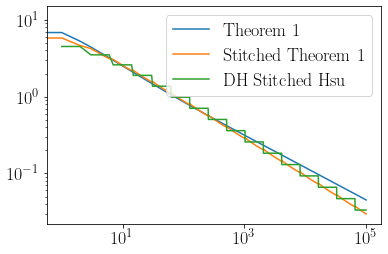

In [10]:
alpha = 0.05 
n = 100000

css = subG_css(5, 1, n, np.log(1/alpha))
stitched_css = stitched_subG_css(5, 1, n, np.log(1/alpha))
stitched_hsu = stitched_Hsu(5, 5, 1, n, np.log(1/alpha))

plt.plot(css, label='Theorem 1')
plt.plot(stitched_css, label='Stitched Theorem 1')
plt.plot(stitched_hsu, label='DH Stitched Hsu')

plt.legend()

plt.yscale('log')
plt.xscale('log')
